In [ ]:
Supply Chain Emissions Modeling Using Industry and Commodity Data (2010–2016)
Problem Statement:

You have annual supply chain emission data from 2010–2016 categorized into industries and commodities. The goal is to develop a regression model that can predict the Supply Chain Emission Factors with Margins based on descriptive and quality metrics (substance, unit, reliability, temporal/geographical/technological/data collection correlations, etc.).

In [5]:
import pandas as pd

# Load your Excel file
df = pd.read_excel("C:/Users/shiva/SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx")

# Display the first 5 rows
df.head()


,Name,Supply Chain GHG Emission Factors for US Commodities and Industries
0,Authors,"Wesley Ingwersen, Mo Li"
1,Description,Tables presenting supply chain and margin emis...
2,DOI,http://doi.org/10.23719/1517769


In [ ]:
### Step 1: Import Required Libraries

We import all necessary libraries for data handling, visualization, modeling, and evaluation. 
- `pandas`, `numpy`: for data manipulation
- `seaborn`, `matplotlib`: for visualization
- `sklearn`: for splitting data, building and evaluating machine learning models


In [2]:
import pandas as pd # data analysis
import numpy as np  # for numerical data
import seaborn as sns # data visualization advanced
import matplotlib.pyplot as plt # basic

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler # Feature Scaling 
from sklearn.ensemble import RandomForestRegressor  # numeric and categoric data together
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

In [ ]:
### Step 2: Define Dataset Source and Load Excel File

In this step, we define the file path for the Excel dataset and specify the range of years we are analyzing (2010–2016).

- `excel_file`: holds the filename or path to the Excel file. This makes it easier to reuse the path later.
- `years`: defines the time range of interest using Python's `range()` function.
- `pd.read_excel()`: loads the Excel sheet into a DataFrame `df` for further processing.

🔍 This dataset includes emission factors categorized by industry and commodity across multiple years.


In [3]:
excel_file = 'SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx'  # Replace with actual path
years = range(2010, 2017)
df = pd.read_excel("C:/Users/shiva/SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx")

In [4]:
years[0]

2010

In [ ]:
### Step 3: Load Year-Specific Sheet from Excel File

The Excel file contains multiple sheets, each representing data for a specific year. In this step, we extract data from the sheet corresponding to the first year in our range (2010).

- `sheet_name=f'{years[0]}_Detail_Commodity'`: dynamically selects the sheet named `'2010_Detail_Commodity'` using an f-string.
- `df_1`: stores the DataFrame for the year 2010.
- `df_1.head()`: displays the first 5 rows of this sheet to understand its structure and contents.

📌 We'll repeat this process to extract sheets for other years in upcoming steps.


In [5]:
df_1 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Commodity')
df_1.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1


In [ ]:
### Step 4: Load Industry-Level Data for 2010

In addition to commodity-level data, the Excel file also contains industry-level emissions data for each year. In this step, we extract the industry-specific sheet for 2010.

- `sheet_name=f'{years[0]}_Detail_Industry'`: dynamically loads the sheet named `'2010_Detail_Industry'`.
- `df_2`: stores the industry-level emissions data for 2010.
- `df_2.head()`: helps preview the structure and understand the columns available.

📊 This data will be useful for comparing emissions across industries versus commodities.


In [6]:
df_2 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Industry')
df_2.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,NaN,4,3,1,4,1


In [ ]:
### Step 5: Extract, Standardize, and Combine Data Across Years (2010–2016)

In this step, we loop through each year from 2010 to 2016 and perform the following actions:

1. **Load Sheets**:
   - `Detail_Commodity` and `Detail_Industry` sheets are read for each year.

2. **Add Metadata Columns**:
   - `'Source'` column is added to distinguish between `Commodity` and `Industry` data.
   - `'Year'` column is added to tag the data with its corresponding year.

3. **Standardize Column Names**:
   - Strips extra spaces from all column headers to ensure consistency.
   - Renames key columns so that both datasets have consistent naming:
     - `'Commodity Code'` / `'Industry Code'` → `'Code'`
     - `'Commodity Name'` / `'Industry Name'` → `'Name'`

4. **Combine and Append**:
   - Each year's cleaned commodity and industry data are concatenated into a single DataFrame.
   - These yearly DataFrames are collected into the `all_data` list.

5. **Error Handling**:
   - If a sheet is missing or any error occurs, a message is printed showing the year and error details.

📦 This results in a unified structure across all years, ready for final merging and analysis.


In [7]:
all_data = []

for year in years:
    try:
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')
        
        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year
        
        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)
        
        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)
        
        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))
        
    except Exception as e:
        print(f"Error processing year {year}: {e}")

In [ ]:
### Step 6: Combine All Years into a Single DataFrame

After collecting the cleaned data for each year into the `all_data` list, we now concatenate all of them into one unified DataFrame:

- `pd.concat(all_data, ignore_index=True)`: merges all yearly DataFrames into a single one.
  - `ignore_index=True` resets the index to avoid duplicates across years.
- `df.head()`: displays the first 5 rows of the combined dataset to verify the merge.

📊 This consolidated DataFrame `df` now contains emissions data from 2010 to 2016, across both commodities and industries — ready for exploration and analysis.


In [8]:
df = pd.concat(all_data, ignore_index=True)
df.head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


In [ ]:
### Step 7: Inspect Column Names

We check the column names in the combined DataFrame using `df.columns`. This helps us:

- Verify that column renaming and standardization worked correctly.
- Identify any remaining inconsistencies (e.g., unexpected spaces or duplicate column names).
- Understand what data is available for analysis going forward.

🧭 This step ensures our dataset is clean and structurally sound before moving to exploratory analysis or visualization.


In [12]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [ ]:
### Step 8: Drop Empty or Unnecessary Columns

During inspection, we observed an unwanted column named `'Unnamed: 7'`, which typically appears when there are extra columns in the Excel file without headers or data.

- `df.drop(columns=['Unnamed: 7'], inplace=True)`: removes this empty column from the DataFrame.
- `inplace=True`: ensures the change is applied directly to `df` without needing reassignment.

🧹 This helps keep the dataset clean and free from irrelevant columns.


In [10]:
# As there is no data avaialble in Unnamed coulmn so we will drop the column
df.drop(columns=['Unnamed: 7'],inplace=True)

In [11]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [ ]:
### Step 9: Review DataFrame Structure and Data Types

We use `df.info()` to get a concise summary of the dataset:

- Number of entries (rows)
- Column names and their data types
- Count of non-null (non-missing) values in each column
- Memory usage

This helps us:
- Identify missing data
- Understand which columns are numerical, categorical, or need type conversion
- Confirm that our data is loaded and structured correctly

🧪 This is a critical step before proceeding to data cleaning or modeling.


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.0,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.0,0.000,0.000,3.349
Supply Chain Emission Factors with Margins,22092.0,0.097681,0.288992,0.0,0.0,0.003,0.052,7.290
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.0,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.0,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.0,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
Year,22092.0,2013.000000,2.000045,2010.0,2011.0,2013.000,2015.000,2016.000


In [15]:
df.isnull().sum()

Code                                                      0
Name                                                      0
Substance                                                 0
Unit                                                      0
Supply Chain Emission Factors without Margins             0
Margins of Supply Chain Emission Factors                  0
Supply Chain Emission Factors with Margins                0
DQ ReliabilityScore of Factors without Margins            0
DQ TemporalCorrelation of Factors without Margins         0
DQ GeographicalCorrelation of Factors without Margins     0
DQ TechnologicalCorrelation of Factors without Margins    0
DQ DataCollection of Factors without Margins              0
Source                                                    0
Year                                                      0
dtype: int64

In [ ]:
### Step 10: Visualize Distribution of the Target Variable

We plot a histogram of the target variable `'Supply Chain Emission Factors with Margins'` to understand its distribution:

- `sns.histplot()`: creates a histogram using seaborn.
  - `df['Supply Chain Emission Factors with Margins']`: selects the target variable.
  - `bins=50`: divides the data range into 50 intervals for granularity.
- `plt.title()`: adds a title for better readability.
- `plt.show()`: renders the plot.

📈 This helps us:
- Understand the spread and skewness of the target variable.
- Detect outliers or anomalies.
- Decide if transformation (e.g., log scaling) is needed for modeling.


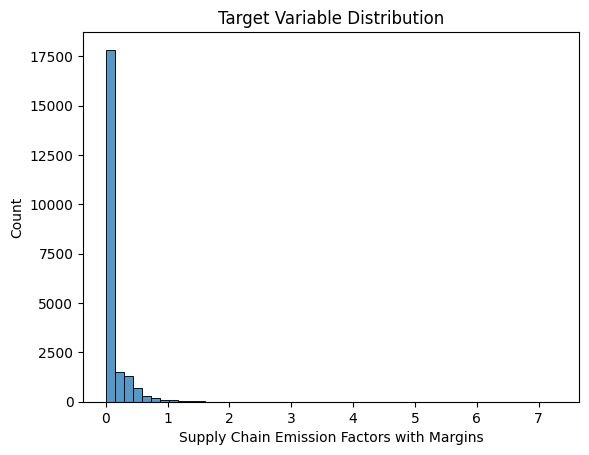

In [16]:
# Visualize distribution
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50)
plt.title('Target Variable Distribution')
plt.show()

In [ ]:
### Step 11: Analyze Categorical Variable — 'Substance'

We examine the distribution of values in the `'Substance'` column, which is a categorical variable:

- `df['Substance'].value_counts()`: returns the frequency count of each unique category in the column.

🔍 This step helps us:
- Understand which substances dominate the dataset.
- Decide whether to filter, group, or encode this variable.
- Identify if any categories are too rare or need merging for modeling.

📊 Categorical analysis is crucial before applying any machine learning models, especially those that do not handle categories directly.


In [17]:
# Check categorical variables
print(df['Substance'].value_counts())

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64


In [18]:
print(df['Unit'].value_counts())

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64


In [19]:
print(df['Source'].value_counts())

Source
Industry     11060
Commodity    11032
Name: count, dtype: int64


In [20]:
df['Substance'].unique()

array(['carbon dioxide', 'methane', 'nitrous oxide', 'other GHGs'],
      dtype=object)

In [ ]:
### Step 12: Encode the 'Substance' Categorical Variable

We convert the `'Substance'` column — originally containing text labels — into numeric codes using a mapping dictionary:

- `substance_map`: defines integer codes for each GHG type:
  - `'carbon dioxide'` → 0
  - `'methane'` → 1
  - `'nitrous oxide'` → 2
  - `'other GHGs'` → 3
- `df['Substance'].map(substance_map)`: replaces text with numeric values.
- `df['Substance'].unique()`: confirms the transformation by showing unique values after encoding.

⚙️ This encoding is necessary because most machine learning models work only with numerical inputs.

✅ The data is now ready for model training in terms of this feature.


In [21]:
substance_map={'carbon dioxide':0, 'methane':1, 'nitrous oxide':2, 'other GHGs':3}

In [22]:
df['Substance']=df['Substance'].map(substance_map)
df['Substance'].unique()

array([0, 1, 2, 3], dtype=int64)

In [23]:
print(df['Unit'].unique())

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [24]:
unit_map={'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price':1}
df['Unit']=df['Unit'].map(unit_map)
print(df['Unit'].unique())

[0 1]


In [25]:
print(df['Source'].unique())

['Commodity' 'Industry']


In [26]:
source_map={'Commodity':0, 'Industry':1}
df['Source']=df['Source'].map(source_map)
print(df['Source'].unique())

[0 1]


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  int64  
 3   Unit                                                    22092 non-null  int64  
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [ ]:
### Step 13: Inspect Unique Codes in the 'Code' Column

We use `df.Code.unique()` to list all distinct values in the `'Code'` column, which likely represents unique identifiers for commodities or industries.

🔍 This step helps us:
- Understand the range and variety of categories present.
- Identify whether codes are numeric or alphanumeric.
- Decide if further preprocessing (e.g., encoding or grouping) is needed for analysis.

🧠 This column may be useful for grouping, filtering, or aggregating data by specific commodity or industry codes.


In [28]:
df.Code.unique()

array(['1111A0', '1111B0', '111200', '111300', '111400', '111900',
       '112120', '1121A0', '112300', '112A00', '113000', '114000',
       '115000', '211000', '212100', '212230', '2122A0', '212310',
       '2123A0', '213111', '21311A', '221100', '221200', '221300',
       '230301', '230302', '233210', '233230', '233240', '233262',
       '2332A0', '2332C0', '2332D0', '233411', '233412', '2334A0',
       '311111', '311119', '311210', '311221', '311224', '311225',
       '311230', '311300', '311410', '311420', '311513', '311514',
       '31151A', '311520', '311615', '31161A', '311700', '311810',
       '3118A0', '311910', '311920', '311930', '311940', '311990',
       '312110', '312120', '312130', '312140', '312200', '313100',
       '313200', '313300', '314110', '314120', '314900', '315000',
       '316000', '321100', '321200', '321910', '3219A0', '322110',
       '322120', '322130', '322210', '322220', '322230', '322291',
       '322299', '323110', '323120', '324110', '324121', '3241

In [29]:
df.Name.unique()

array(['Fresh soybeans, canola, flaxseeds, and other oilseeds',
       'Fresh wheat, corn, rice, and other grains',
       'Fresh vegetables, melons, and potatoes',
       'Fresh fruits and tree nuts',
       'Greenhouse crops, mushrooms, nurseries, and flowers',
       'Tobacco, cotton, sugarcane, peanuts, sugar beets, herbs and spices, and other crops',
       'Dairies', 'Cattle ranches and feedlots', 'Poultry farms',
       'Animal farms and aquaculture ponds (except cattle and poultry)',
       'Timber and raw forest products', 'Wild-caught fish and game',
       'Agriculture and forestry support', 'Unrefined oil and gas',
       'Coal', 'Copper, nickel, lead, and zinc',
       'Iron, gold, silver, and other metal ores', 'Dimensional stone',
       'Sand, gravel, clay, phosphate, other nonmetallic minerals',
       'Well drilling', 'Other support activities for mining',
       'Electricity', 'Natural gas',
       'Drinking water and wastewater treatment',
       'Nonresidential mai

In [30]:
len(df.Name.unique())

713

In [ ]:
### Step 14: Drop Unnecessary or Non-Numeric Columns

To prepare the dataset for machine learning, we remove columns that are:

- Non-numeric and not useful for modeling (e.g., `'Name'`)
- Not relevant to prediction or contain high cardinality with limited interpretive value:
  - `'Code'`: a unique identifier, unlikely to aid prediction
  - `'Year'`: since we are analyzing overall trends across all years, this may be excluded

```python
df.drop(columns=['Name', 'Code', 'Year'], inplace=True)


In [31]:
# Drop non-numeric columns not needed,
# Alos drop Code and Year columns since there is no need of both of the columns
df.drop(columns=['Name','Code','Year'], inplace=True)

In [33]:
df.shape

(22092, 11)

In [ ]:
### Step 15: Define Features and Target Variable + Visualize Categorical Feature

#### 🎯 Define Inputs and Output:
- `X`: feature matrix — all columns **except** the target (`'Supply Chain Emission Factors with Margins'`).
- `y`: target vector — the emission factor we aim to predict.

```python
X = df.drop(columns=['Supply Chain Emission Factors with Margins'])
y = df['Supply Chain Emission Factors with Margins']


In [34]:
# Define features and target
X = df.drop(columns=['Supply Chain Emission Factors with Margins'])
y = df['Supply Chain Emission Factors with Margins']

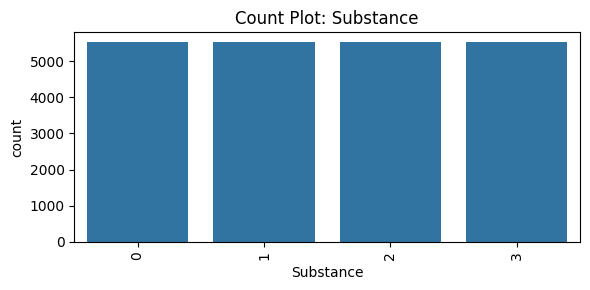

In [35]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
### Step 16: Visualize Distribution of the 'Unit' Column

We create a count plot for the `'Unit'` column to examine the frequency of different units of measurement used in the dataset:

- `sns.countplot(x=df["Unit"])`: generates a bar chart showing the count of each unique unit.
- `plt.xticks(rotation=45)`: tilts the x-axis labels for readability.
- `plt.tight_layout()`: adjusts layout to prevent label overlap.

📏 This step helps us:
- Understand the diversity of units in the dataset
- Identify any dominant units
- Decide if unit standardization is needed for consistency


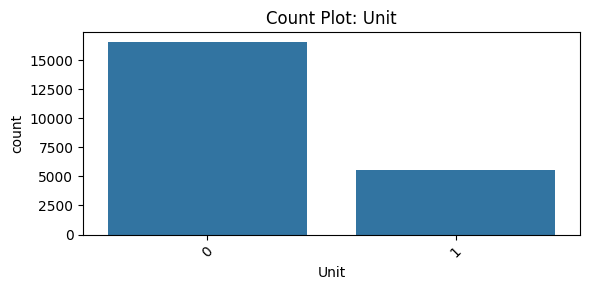

In [36]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

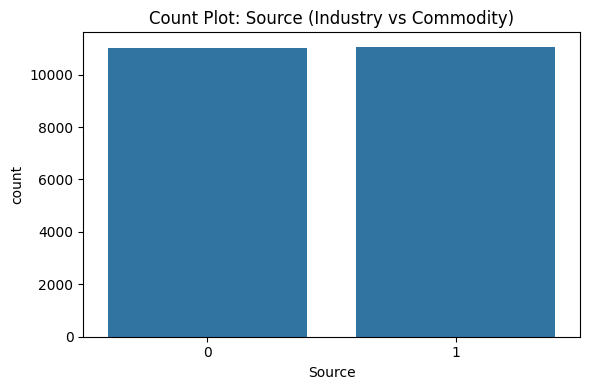

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()

In [ ]:
### Step 17: Check Correlation Between Numeric Features

We compute the correlation matrix for all numeric columns using:

```python
df.select_dtypes(include=np.number).corr()


In [38]:
df.select_dtypes(include=np.number).corr()

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
Substance,1.000000e+00,7.745967e-01,-0.391851,-0.218400,-0.421603,0.095092,-3.667637e-15,NaN,0.198415,NaN,4.273306e-16
Unit,7.745967e-01,1.000000e+00,-0.155859,-0.094300,-0.169741,-0.025159,-3.173071e-17,NaN,0.286990,NaN,-1.545892e-17
Supply Chain Emission Factors without Margins,-3.918505e-01,-1.558594e-01,1.000000,0.143005,0.962971,-0.098000,9.283870e-03,NaN,0.148410,NaN,2.713112e-02
Margins of Supply Chain Emission Factors,-2.184002e-01,-9.429989e-02,0.143005,1.000000,0.404541,-0.069598,7.953109e-03,NaN,0.086335,NaN,-6.750426e-02
Supply Chain Emission Factors with Margins,-4.216032e-01,-1.697410e-01,0.962971,0.404541,1.000000,-0.109494,1.074848e-02,NaN,0.160574,NaN,6.687828e-03
DQ ReliabilityScore of Factors without Margins,9.509190e-02,-2.515938e-02,-0.098000,-0.069598,-0.109494,1.000000,-2.170715e-02,NaN,0.073583,NaN,-1.228726e-02
DQ TemporalCorrelation of Factors without Margins,-3.667637e-15,-3.173071e-17,0.009284,0.007953,0.010748,-0.021707,1.000000e+00,NaN,-0.030607,NaN,-2.909814e-15
DQ GeographicalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TechnologicalCorrelation of Factors without Margins,1.984154e-01,2.869901e-01,0.148410,0.086335,0.160574,0.073583,-3.060675e-02,NaN,1.000000,NaN,2.827202e-02
DQ DataCollection of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               22092 non-null  int64  
 1   Unit                                                    22092 non-null  int64  
 2   Supply Chain Emission Factors without Margins           22092 non-null  float64
 3   Margins of Supply Chain Emission Factors                22092 non-null  float64
 4   Supply Chain Emission Factors with Margins              22092 non-null  float64
 5   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 6   DQ TemporalCorrelation of Factors without Margins       22092 non-null  int64  
 7   DQ GeographicalCorrelation of Factors without Margins   22092 non-null  int64  
 8   DQ TechnologicalCorrelation of Facto

In [ ]:
### Step 18: Visualize Correlation Matrix Using a Heatmap

We plot a heatmap to visualize correlations between numeric features in the dataset:

- `df.select_dtypes(include=np.number).corr()`: computes the correlation matrix.
- `sns.heatmap(..., annot=True, cmap="coolwarm")`: creates a heatmap with:
  - `annot=True`: displays the correlation coefficients inside the cells.
  - `cmap="coolwarm"`: applies a color gradient from cool (low) to warm (high) values.
- `plt.figure(figsize=(12, 8))`: sets the plot size for clarity.

📊 This visual helps:
- Spot highly correlated feature pairs (positive or negative)
- Understand how features relate to the target variable
- Decide whether to drop or combine features in future preprocessing


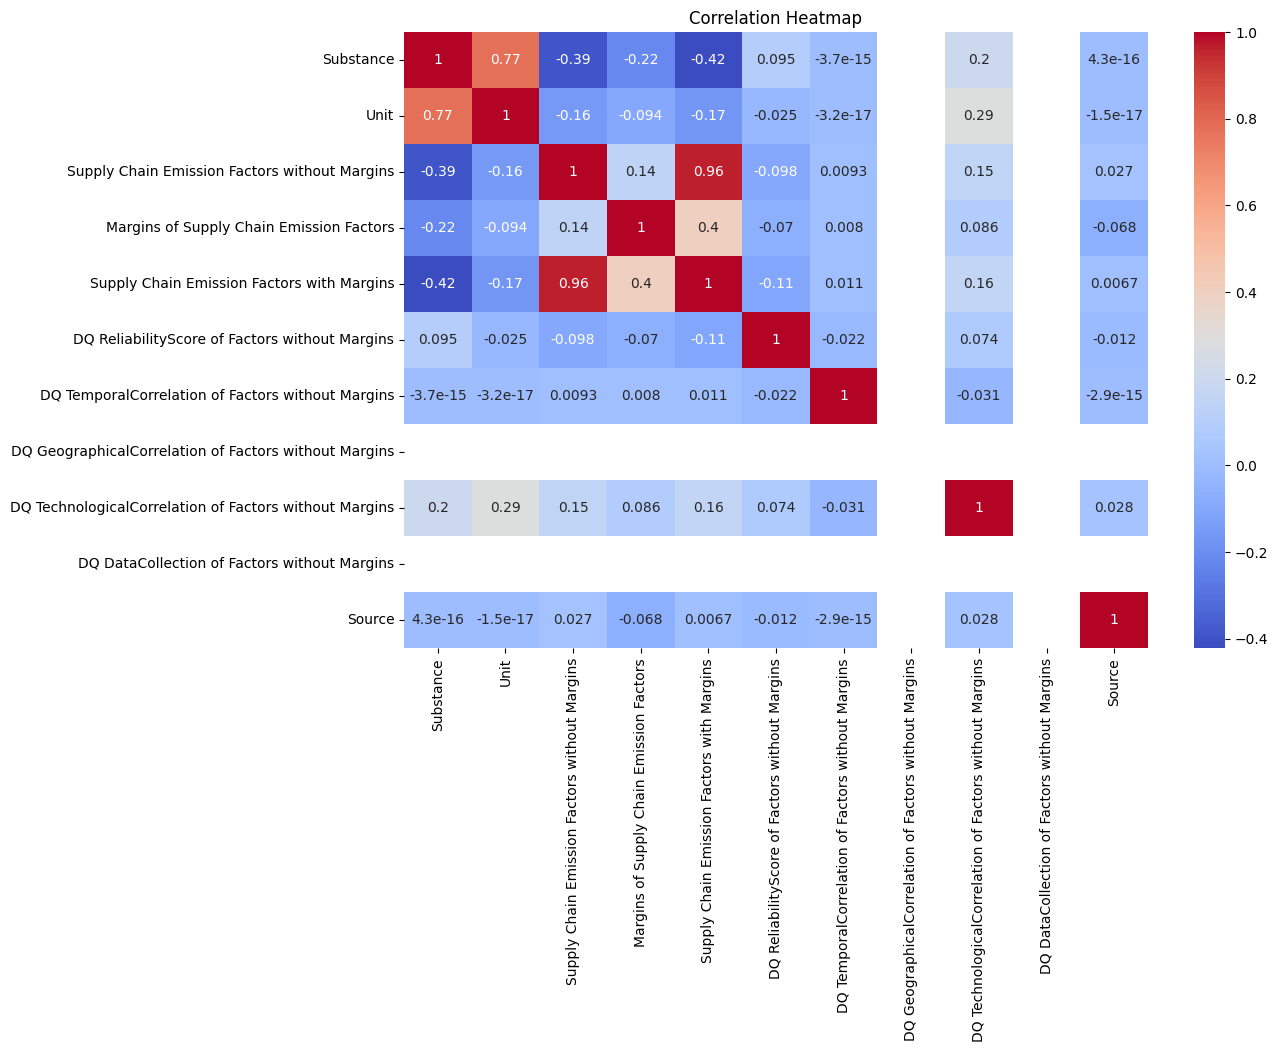

In [40]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
### Step 19: Normalize Features and Train Random Forest Regressor

We prepare the data for training by scaling the features and fitting a machine learning model:

#### 🧮 1. Normalize Features
- `StandardScaler()` standardizes the data to have mean = 0 and standard deviation = 1.
- This is especially useful for algorithms sensitive to feature scale (though Random Forest is less affected).

#### 📊 2. Split Data
- `train_test_split(...)` divides the data into 80% training and 20% testing sets.
- `random_state=42` ensures reproducibility.

#### 🌲 3. Train Model
- `RandomForestRegressor()` is chosen as the machine learning model for regression.
- `.fit(X_train, y_train)`: fits the model to the training data.

✅ This step sets the stage for evaluating the model's performance on unseen data.


In [41]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [44]:
model = RandomForestRegressor(random_state=42)

In [45]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
### Step 20: Evaluate Model Performance

We evaluate the performance of the trained Random Forest model using common regression metrics:

- `model.predict(X_test)`: generates predictions on the test set.
- `mean_squared_error()`: calculates Mean Squared Error (MSE).
- `np.sqrt(mse)`: computes Root Mean Squared Error (RMSE), which has the same units as the target variable.
- `r2_score()`: calculates the R² (coefficient of determination), where:
  - R² ≈ 1 indicates a perfect fit.
  - R² closer to 0 indicates poor predictive power.

```python
RMSE: {rmse}
R² Score: {r2}


In [47]:
y_pred = model.predict(X_test)
# r2_sccore approx 1 gives us perfecr model

In [48]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

RMSE: 0.006143789217304181
R² Score: 0.9993280085696331


In [ ]:
### Step 21: Hyperparameter Tuning Using Grid Search

To improve model performance and reduce the risk of overfitting, we perform hyperparameter tuning using `GridSearchCV`.

#### ⚙️ Why This Step?
Random Forest models can overfit if parameters like tree depth or number of estimators are not properly controlled. Grid search helps find the optimal combination of parameters.

#### 🔍 Parameters Tuned:
- `n_estimators`: number of trees in the forest (`[100, 200]`)
- `max_depth`: maximum depth of the trees (`[None, 10, 20]`)
- `min_samples_split`: minimum number of samples required to split an internal node (`[2, 5]`)

#### 🧪 How It Works:
- `GridSearchCV(...)`: performs cross-validation (with `cv=3`) across all combinations in the parameter grid.
- `n_jobs=-1`: uses all available CPU cores for faster computation.
- `fit(...)`: trains and evaluates all parameter combinations.
- `grid_search.best_estimator_`: retrieves the best performing model.

📌 This step helps optimize model performance and prevent overfitting by selecting the most effective parameter set.


In [52]:
# When the model performs very well on the training data we say that it is overfit

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
### Step 22: Final Model Evaluation After Hyperparameter Tuning

After selecting the best model from `GridSearchCV`, we evaluate its performance on the test set:

- `best_model.predict(X_test)`: makes predictions using the tuned model.
- `mean_squared_error(...)`: computes Mean Squared Error.
- `np.sqrt(...)`: converts it to RMSE (Root Mean Squared Error).
- `r2_score(...)`: calculates the R² score to assess how well the model explains variance in the data.

```python
Final RMSE: ...
Final R²: ...


In [53]:
y_pred_best = best_model.predict(X_test)

print("Final RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("Final R²:", r2_score(y_test, y_pred_best))

Final RMSE: 0.005948528382514106
Final R²: 0.9993700440298772


In [54]:
!mkdir models

In [ ]:
### Step 23: Save the Final Model and Scaler for Deployment

To reuse the trained model and preprocessing steps in the future (e.g., in a web app or API), we save them using `joblib`:

- `joblib.dump(best_model, 'models/final_model.pkl')`: saves the best-performing Random Forest model to a `.pkl` file.
- `joblib.dump(scaler, 'models/scaler.pkl')`: saves the feature scaler used during training.

📦 Storing these files allows for consistent prediction without retraining the model every time. Make sure the `'models/'` directory exists before saving, or create it using `os.makedirs('models', exist_ok=True)`.


In [55]:
# Save model and encoders
joblib.dump(best_model, 'models/final_model.pkl')   
joblib.dump(scaler, 'models/scaler.pkl')

['models/scaler.pkl']

In [56]:
X.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')

In [ ]:
from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(y_test, y_pred_best)

# Convert to percentage
accuracy_percentage = r2 * 100
print(f"Model Accuracy: {accuracy_percentage:.2f}%")
